# Part 2: Classification Problem 

Note: Some of the cells in the code will take some time to run(specifically random forest and XGBoost). Please be patient.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE




C:\Users\ADITI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Let us load the datafiles 
bankData=pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# dividing data into dependent and independent
XBank = bankData.loc[:, bankData.columns != 'y']
yBank = bankData['y']


In [6]:
# checking for categorical and numeric value count
numCount = XBank.dtypes[XBank.dtypes != "object"].index
print("Numerical data count: ", len(numCount))

catCount = XBank.dtypes[XBank.dtypes == "object"].index
print("Categorical data count: ", len(catCount))

Numerical data count:  10
Categorical data count:  10


In [7]:
catCount.values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], dtype=object)

In [8]:
# converting all categorical values in XBank to nemeric using getDummies
for cat in catCount.values:
    XBank=pd.get_dummies(XBank,prefix=[cat],columns=[cat], drop_first = True)

In [9]:
XBank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [10]:
XBank.shape

(41188, 53)

In [11]:
# converting target variable to numeric values by mapping individual values. yes--> 1 and no--> 0.
dictionary={'yes':1,'no':0}
yBank=yBank.map(dictionary)
print(yBank.unique())

[0 1]


### Splitting data into train=70% and test = 30%.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(XBank, yBank, test_size = 0.30, random_state = 42)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 53)
(28831,)
(12357, 53)
(12357,)


## Logistic Regression

### Applying logistic regression without any model tuning.

In [14]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Evaluating the model: 

[[10700   268]
 [  819   570]]


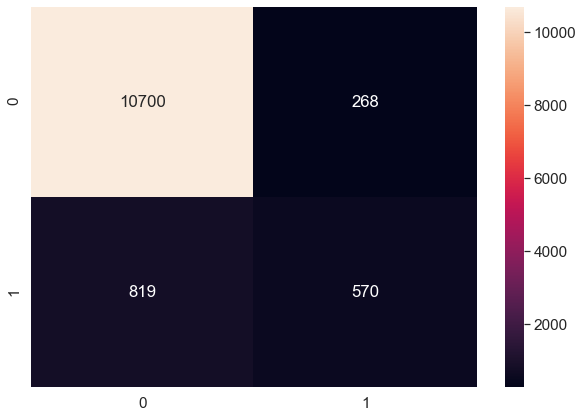

In [15]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as plab

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [16]:
print("Train Accuracy: {:.3f}".format(logReg.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(logReg.score(X_test, y_test)))

precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Train Accuracy: 0.909
Test Accuracy: 0.912
Precision: 0.680
Recall: 0.410
F-Measure: 0.512


### The values of precision, recall and f1score are not very good. Therefore, we need to check for class imbalance and tune our model.

## Checking for class imbalance

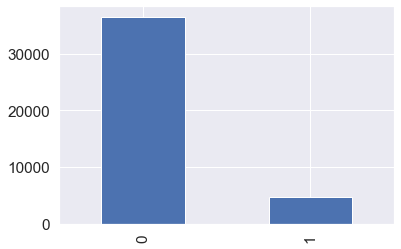

In [17]:
yBank.value_counts().plot(kind='bar')

## Oversampling target variable using SMOTE

In [18]:
# import sys
# !{sys.executable} -mpip install imblearn

In [19]:
# !pip install imblearn

In [21]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(XBank, yBank)

In [22]:
X_sm.shape

(73096, 53)

In [23]:
y_sm.shape

(73096,)

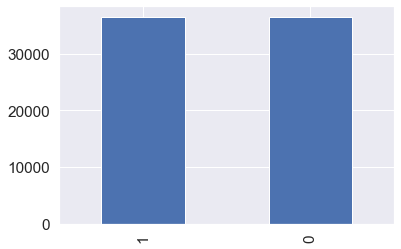

In [24]:
y_sm.value_counts().plot(kind='bar')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = 42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51167, 53)
(51167,)
(21929, 53)
(21929,)


In [27]:
# applying the model again

logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[9862 1143]
 [1097 9827]]


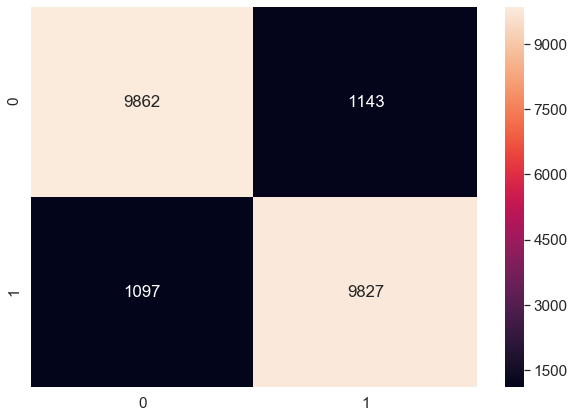

In [28]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [29]:
train_Acc = logReg.score(X_train, y_train)
test_Acc = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
score = f1_score(y_test, y_pred, average='binary')

results = pd.DataFrame([['Logistic Regression', train_Acc, test_Acc, precision, recall, score]],
                       columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895734,0.897852,0.895807,0.899579,0.897689


### Applying Feature Reduction techniques

In [30]:
from sklearn.feature_selection import RFE
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select= None)
rfe=rfe.fit(X_sm,y_sm.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[False False False False False False False False False False  True  True
  True  True  True  True  True False  True  True  True False False False
  True  True  True False  True  True  True False False False False False
 False  True  True False  True False False  True  True False False  True
  True  True  True False  True]
[22 21 17 26 13 16 19 23 24 20  1  1  1  1  1  1  1 14  1  1  1  4  3  6
  1  1  1 27  1  1  1  2 28  7 11 10  8  1  1 15  1  5 18  1  1 25  9  1
  1  1  1 12  1]


In [31]:
logReg_RFE = LogisticRegression()
logReg_RFE.fit(X_train[X_train.columns[rfe.support_]], y_train)
y_pred = logReg_RFE.predict(X_test[X_train.columns[rfe.support_]])


[[9897 1108]
 [1239 9685]]


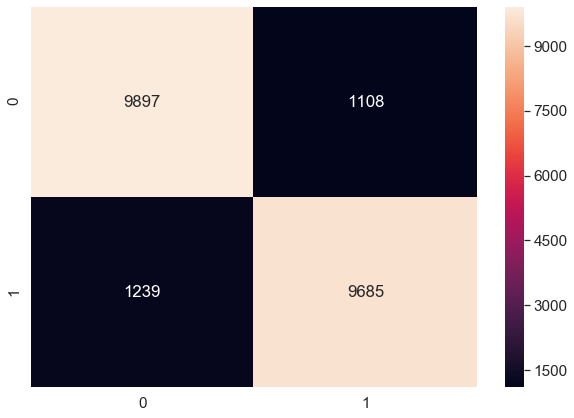

In [32]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as plab
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [33]:
train_Acc = logReg_RFE.score(X_train[X_train.columns[rfe.support_]], y_train)
test_Acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE ', train_Acc, test_Acc, prec, rec, f1]],
               columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895734,0.897852,0.895807,0.899579,0.897689
1,Logistic Regression RFE,0.897336,0.892973,0.897341,0.886580,0.891928


### There is a marginal difference between logistic regression before applying RFE and after that.

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print("Train Accuracy: {:.3f}".format(rfc.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(rfc.score(X_test, y_test)))

precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Train Accuracy: 1.000
Test Accuracy: 0.953
Precision: 0.950
Recall: 0.955
F-Measure: 0.953


### Train accuracy is 100% and test is 95%. Which means that the model is overfitting the data.
### Lets see if we can get better model by hyperparameter tuning using RandomizedSearchCV.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [5,10,15,20,25,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion' :['gini', 'entropy']
}

clf = RandomizedSearchCV(rfc, param_grid, n_iter=50, cv=5, random_state=1)
clf.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [5, 10, 15, 20, 25,
                                                         30]},
                   random_state=1)

In [36]:
print(clf.best_params_)
y_pred = clf.predict(X_test)

{'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


[[ 9793  1212]
 [  528 10396]]


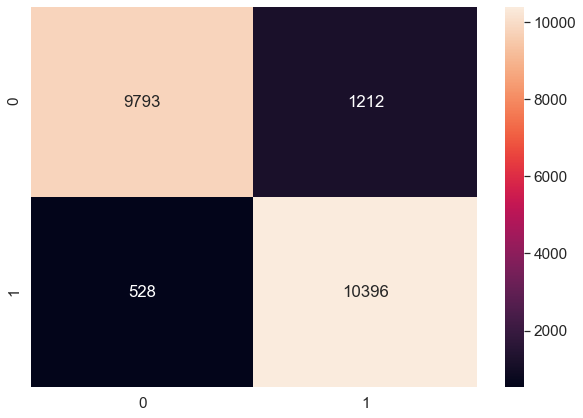

In [37]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as plab
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [38]:
train_Acc = clf.score(X_train, y_train)
test_Acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', train_Acc, test_Acc, prec, rec, f1]],
               columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895734,0.897852,0.895807,0.899579,0.897689
1,Logistic Regression RFE,0.897336,0.892973,0.897341,0.886580,0.891928
2,Random Forest,0.927414,0.920653,0.895589,0.951666,0.922776


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier()
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)

print("Train Accuracy: {:.3f}".format(dTree.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(dTree.score(X_test, y_test)))

precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Train Accuracy: 1.000
Test Accuracy: 0.932
Precision: 0.926
Recall: 0.938
F-Measure: 0.932


### Train accuracy is 100% and test is 95%. Which means that the model is overfitting the data.
### Lets see if we can get better model by hyperparameter tuning using RandomizedSearchCV.

In [42]:
# Import necessary modules
from scipy.stats import randint

param_grid = {"max_features": randint(1, 9),
              "max_depth" : [2,4,6,8,10,12,14,16,18,20],
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
dTree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
dt = RandomizedSearchCV(dTree, param_grid, n_iter=50, cv=5, random_state=1)
dt.fit(X_train,y_train)

print(dt.best_params_)
y_pred = dt.predict(X_test)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_leaf': 2}


[[10090   915]
 [ 1015  9909]]


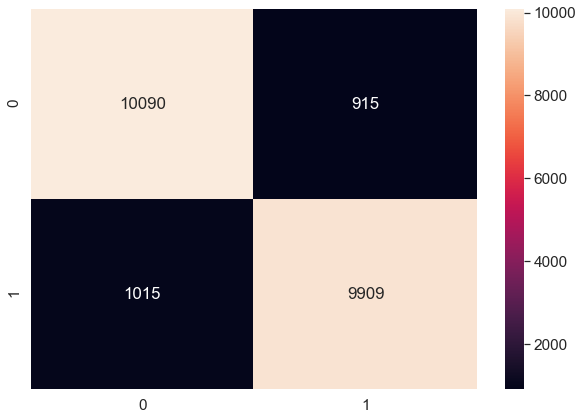

In [43]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as plab
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [44]:
train_Acc = dt.score(X_train, y_train)
test_Acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', train_Acc, test_Acc, prec, rec, f1]],
               columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895734,0.897852,0.895807,0.899579,0.897689
1,Logistic Regression RFE,0.897336,0.892973,0.897341,0.886580,0.891928
2,Random Forest,0.927414,0.920653,0.895589,0.951666,0.922776
3,Decision Tree,0.940059,0.911989,0.915466,0.907085,0.911256


In [ ]:
## Checking for accuracy and depth plot

from sklearn.model_selection import cross_val_score
scores = []
depth_values = []
for depth in range(1,25):
    classifier = DecisionTreeClassifier(max_depth = depth)
    if classifier.fit(X_train, y_train).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy',
                                    cv = 5))
    depth_values.append(depth)
    scores.append(score)
#     print('Depth: {} \t Accuracy: {}\n'.format(depth, score))

import matplotlib.pyplot as plt
plt.plot(depth_values, scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


## XGBoost

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print("Train Accuracy: {:.3f}".format(xgb.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(xgb.score(X_test, y_test)))

precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)


Train Accuracy: 0.937
Test Accuracy: 0.936
Precision: 0.918
Recall: 0.956
F-Measure: 0.937


### Lets see if we can get better model by hyperparameter tuning using RandomizedSearchCV.

In [ ]:
from xgboost import XGBClassifier

param_grid = {"learning_rate":[0.05,0.15],
              'n_estimators': [5,10,15,20,25],
              "max_depth" : [4,8,12,16,20],
              "min_child_weight":[1,2,4],
              "booster": ['gbtree','gblinear'],
              "base_score":[0.25,0.5,1]
             }
# Instantiate a Decision Tree classifier
xgb = XGBClassifier()

# Instantiate the RandomizedSearchCV object
xgb_cv = RandomizedSearchCV(xgb, param_grid, n_iter=50, cv=8, random_state=1)
xgb_cv.fit(X_train,y_train)

# make predictions for test data
y_pred = xgb_cv.predict(X_test)

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\ADITI\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

In [ ]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as plab
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [ ]:
train_Acc = xgb_cv.score(X_train, y_train)
test_Acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', train_Acc, test_Acc, prec, rec, f1]],
               columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

#### Model evaluation results:
(please don't run the cell, it is not in the proper table format.)

#### Model	                       Train Accuracy   Test Accuracy	Precision	Recall	    F1 Score
#### 0	Logistic Regression	            0.895734	0.897852	    0.895807	0.899579	0.897689
#### 1	Logistic Regression RFE	        0.897336	0.892973	    0.897341	0.886580	0.891928
#### 2	Random Forest	                0.927414	0.920653	    0.895589	0.951666	0.922776
#### 3	Decision Tree	                0.940059	0.911989	    0.915466	0.907085	0.911256
#### 4   XGBoost                         0.99726     0.950859        0.945130    0.957146    0.951100

In [ ]:
| xgboost | ridge | lasso | elasticnet | randomforest |
| :-: | :-: | :-: | :-: | :-: | 
| 0.13369 | 0.13765 | 0.14367 | 0.13772 | 0.15070 |

## Analysis from above results:

After applying various models on dataset, it can be said that decision tree model has performed best among others. The training and test accuracy is maximum and other model evaluation parameters are also better than others. 
XGBoost has also shown pretty good results but there is a difference in train and test accuracy, which can be because of the model complexity and may hve overfit the data.